# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.8.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.8.2 on the current Colab Runtime...
2024-03-10 13:11:29 URL:https://julialang-s3.julialang.org/bin/linux/x64/1.8/julia-1.8.2-linux-x86_64.tar.gz [135859273/135859273] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.8

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
versioninfo()

Julia Version 1.8.2
Commit 36034abf260 (2022-09-29 15:21 UTC)
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, broadwell)
  Threads: 2 on 2 virtual cores
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


In [ ]:
using BenchmarkTools

M = rand(2^11, 2^11)

@btime $M * $M;

  502.491 ms (2 allocations: 32.00 MiB)


In [ ]:
try
    using CUDA
catch
    println("No GPU found.")
else
    run(`nvidia-smi`)
    # Create a new random matrix directly on the GPU:
    M_on_gpu = CUDA.CURAND.rand(2^11, 2^11)
    @btime $M_on_gpu * $M_on_gpu; nothing
end

No GPU found.


In [ ]:
using Pkg
Pkg.add("Graphs")
Pkg.add("GraphIO")
Pkg.add("Plots")


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Inflate ──────────── v0.1.4
   Installed OrderedCollections ─ v1.6.3
   Installed StaticArraysCore ─── v1.4.2
   Installed ArnoldiMethod ────── v0.2.0
   Installed MacroTools ───────── v0.5.13
   Installed DataStructures ───── v0.18.18
   Installed StaticArrays ─────── v1.9.3
   Installed Compat ───────────── v4.14.0
   Installed SimpleTraits ─────── v0.9.4
   Installed Graphs ───────────── v1.9.0
    Updating `~/.julia/environments/v1.8/Project.toml`
  [86223c79] + Graphs v1.9.0
    Updating `~/.julia/environments/v1.8/Manifest.toml`
⌅ [ec485272] + ArnoldiMethod v0.2.0
  [34da2185] + Compat v4.14.0
  [864edb3b] + DataStructures v0.18.18
  [86223c79] + Graphs v1.9.0
  [d25df0c9] + Inflate v0.1.4
  [1914dd2f] + MacroTools v0.5.13
  [bac558e1] + OrderedCollections v1.6.3
  [699a6c99] + SimpleTraits v0.9.4
  [90137ffa] + StaticArrays v1.9.3
  [1e83bf80] + StaticArraysCore v1.4.2
  [8b

In [ ]:
using GraphIO.NET
using Graphs

file_path = "/content/Network/real/airports_UW.net"
network=Graphs.loadgraph(file_path, "graph_key", NETFormat())

# Reading the .net file
#graph = GraphIO.loadgraph(file_path, GraphIO.PajekFormat())

{3618, 14142} undirected simple Int64 graph

In [ ]:
# First working version

using Plots

# Function to calculate the degree probability distribution function
function degree_pdf(graph, num_bins::Int=2, log_plot::Bool=false, CCDF::Bool:false)

    degree_counts = Graphs.degree_histogram(graph)

    # Calculate probabilities
    num_nodes = nv(graph)


    pdf = Dict(degree => count / num_nodes for (degree, count) in degree_counts)

    degrees = collect(keys(pdf))
    probabilities = collect(values(pdf))

    if CCDF
      # Calculate CCDF
      ccdf_values = 1.0 .- cumsum(probabilities)

      if log_plot
        plot = histogram(degrees, weights=ccdf_values, xlabel="Log Degree (K)", ylabel="Comp. Cum. Probability (P(K))", legend=false, bins=num_bins, yscale=:log10)
      else
        plot = histogram(degrees, weights=ccdf_values, xlabel="Log Degree (K)", ylabel="Comp. Cum. Probability (P(K))", legend=false, bins=num_bins)
      end


    else
    #plot=histogram(degrees,weights=probabilities,xlabel="Degree (K)", ylabel="Probability (P(K))", legend=false, bins=num_bins)

      if log_plot
        plot = histogram(degrees, weights=probabilities, xlabel="Degree (K)", ylabel="Probability (P(K))", legend=false, bins=num_bins, yscale=:log10)
      else
        plot = histogram(degrees, weights=probabilities, xlabel="Degree (K)", ylabel="Probability (P(K))", legend=false, bins=num_bins)
      end

    end

    return plot
end




LoadError: syntax: optional positional arguments must occur at end around In[6]:6

In [ ]:

using Plots

 #Fucntion to select the number of decimals displayed in the charts
  function custom_xformatter(x)
    return string(round(x, digits=3))
  end

# Function to calculate the degree probability distribution function and the complimentary cummulative distribution function

function degree_pdf(graph, num_bins::Int=10, log_scale::Bool=false, CCDF::Bool=false)

    degree_counts = sort(Graphs.degree_histogram(graph))
    l = length(degree_counts)
    lr = 0
    hr = 0

  #=
    if num_bins > l
      num_bins = l
      println("Not feasible to have a number of bins ($num_bins) greater than the actual number of different degree values, building the histogram with $l bins.")
    elseif l%num_bins !=0
      for i in num_bins:l
        if l%i == 0
          hr = i
          break
        end
      end
      for i in l-1:-1:num_bins
        if l%i == 0
          lr = i
          break
        end
      end
      bn = num_bins - min(num_bins - hr, num_bins - lr)
      println("$l different degree values. Not feasible to build the histogram with $num_bins bins, building the histogram with the closest feasible number - $bn bins.")
      num_bins = bn
    end
  =#


    println("Degree counts $degree_counts")

    degree_counts_f = Dict([(k, 0) for k in Iterators.partition(keys(degree_counts), Int(round(l/num_bins)))])

    for i in keys(degree_counts)
      for j in keys(degree_counts_f)
        if i in j
          degree_counts_f[j] += degree_counts[i]
        end
      end
    end
    println("Sumed degree counts $degree_counts_f")

    # Calculate probabilities
    num_nodes = nv(graph)
    pdf =sort( Dict(degree => count / num_nodes for (degree, count) in degree_counts_f))

    println("PDF: $pdf")

    degrees = collect(keys(pdf))
    probabilities = collect(values(pdf))

    println("Degrees: $degrees")
    println("Probabilities: $probabilities")


    if log_scale

    # Find 𝑘min = min(𝑘) and 𝑘max = max(𝑘) to change to log-scale
    k_min = minimum(degree(graph))
    k_max = maximum(degree(graph))
    log_data = log.(degree(network))
    bin_edges = range(log(k_min), stop=log(k_max + 1), length=num_bins+1)
    total_elements = length(log_data)

    bin_counts = zeros(Int, length(bin_edges))

    for element in log_data
        # Find the index of the bin the element belongs to
        bin_index = findfirst(x -> x >= element, bin_edges[2:length(bin_counts)])
        # Increment the count for the corresponding bin
        bin_counts[bin_index] += 1
      end

    bin_counts=bin_counts[1:length(bin_counts)-1]

    probabilities=bin_counts/total_elements

        # Calculate CCDF
        if CCDF
          ccdf_values = 1.0 .- cumsum(probabilities)
          plot=bar(bin_edges, ccdf_values,  xlabel="log(K)", ylabel="Comp. Cum. Log(Pk)", title="CCDF Log-Log Histogram",xticks=bin_edges, legend=false,bar_edges=false,xrotation=45, xformatter=custom_xformatter )

        else
          plot=bar(bin_edges, probabilities,  xlabel="log(K)", ylabel="Log(Pk)", title="Log-Log PDF Histogram",xticks=bin_edges, legend=false,bar_edges=false,xrotation=45, xformatter=custom_xformatter )

        end

    else

      if CCDF
       print("Hola")
       # plt=histogram(degrees, weights=probabilities, bins=num_bins)

        #deg_bins=plt[1][2][:x]
        #prob_bins=plt[1][2][:y]

         # Calculate CCDF
        #cum_prob_bins=1 .- cumsum(prob_bins)
        cum_prob_bins=1 .- cumsum(probabilities)
        print(cum_prob_bins)

        # plot=bar(deg_bins,cum_prob_bins, xlabel="Degree (k)", ylabel="Comp. Cum. P(k)", title=" CCDF Histogram",xticks=deg_bins, legend=false,bar_edges=false,xrotation=45, xformatter=custom_xformatter )
        plot=bar(string.(degrees),cum_prob_bins, xlabel="Degree (k)", ylabel="Comp. Cum. P(k)", title=" CCDF Histogram", legend=false,bar_edges=false,xrotation=45, xformatter=custom_xformatter )


      else
        plot = histogram(degrees, weights=probabilities, xlabel="Degree (k)", ylabel="Probability (P(K))", title="PDF Histogram", legend=false, bins=num_bins, xformatter=custom_xformatter )
        #plot=bar(string.(degrees), probabilities, xlabel="Degree (k)", ylabel="Probability (P(K))", title="PDF Histogram",  legend=false, bins=num_bins, xformatter=custom_xformatter)
      end

    end

    return plot
end




degree_pdf (generic function with 4 methods)

In [ ]:
#degree_pdf(graph, bins, log_scale, CCDF)
degree_pdf(network, 10, false, false)

NameError: name 'degree_pdf' is not defined

In [ ]:
collect(Iterators.partition(collect(1:113),10))

12-element Vector{SubArray{Int64, 1, Vector{Int64}, Tuple{UnitRange{Int64}}, true}}:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
 [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
 [21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
 [31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
 [41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
 [51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
 [61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
 [71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
 [81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
 [91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
 [101, 102, 103, 104, 105, 106, 107, 108, 109, 110]
 [111, 112, 113]

In [ ]:
degree_counts = Graphs.degree_histogram(network)
b = 3
l = length(degree_counts)
lr = 0
hr = 0

if b > l
  b = l
  println("Not feasible to have a number of bins ($b) greater than the actual number of different degree values, building the histogram with $l bins.")
elseif l%b !=0
  for i in b:l
    if l%i == 0
      hr = i
      break
    end
  end
  for i in l-1:-1:b
    if l%i == 0
      lr = i
      break
    end
  end
  println(lr, hr)
  println("\n")
  println(b - hr)
  println("\n")
  println(b - lr)
  println("\n")
  println(min(b - hr, b - lr))
  println("\n")
  bn = b - min(b - hr, b - lr)
  println("$l different degree values. Not feasible to build the histogram with $b bins, building the histogram with the closest feasible number - $bn bins.")
  b = bn
end

print(b)

3

In [ ]:
sort(degree_counts)

OrderedCollections.OrderedDict{Int64, Int64} with 12 entries:
  1  => 9
  2  => 6
  3  => 6
  4  => 5
  5  => 8
  6  => 8
  7  => 7
  8  => 4
  9  => 4
  10 => 2
  11 => 2
  12 => 1

In [ ]:
Iterators.partition(keys(degree_counts), 2)

Base.Iterators.PartitionIterator{Base.KeySet{Int64, Dict{Int64, Int64}}}([5, 12, 8, 1, 6, 11, 9, 3, 7, 4, 2, 10], 2)

In [ ]:
Dict([(k, 0) for k in Iterators.partition(keys(degree_counts), 1)])

Dict{Vector{Int64}, Int64} with 12 entries:
  [3]  => 0
  [5]  => 0
  [7]  => 0
  [12] => 0
  [8]  => 0
  [1]  => 0
  [4]  => 0
  [6]  => 0
  [11] => 0
  [2]  => 0
  [10] => 0
  [9]  => 0

In [ ]:
12/12

1.0

In [ ]:
bin_counts = zeros(Int, length(bin_edges))
delta=bin_edges[2]-bin_edges[1]+1e-12

for element in log_data
    # Find the index of the bin the element belongs to
    bin_index = findfirst(x -> x >= element, bin_edges[2:length(bin_counts)])
    # Increment the count for the corresponding bin
    bin_counts[bin_index] += 1
  end

bin_counts=bin_counts[1:length(bin_counts)-1]

probabilities=bin_counts/total_elements

bar(
    xlabel="log(k)",
    ylabel="Probability",
    title="Log-Log Scale Histogram",
    xticks=bin_edges,
    legend=false,
    bar_width=0.8,
    bar_edges=false,
    seriestype=:bar,
    bins=bin_edges,
    weights=probabilities,
)


LoadError: UndefVarError: bin_edges not defined

In [ ]:

# Plot the bar chart




In [ ]:
bin_counts = zeros(Int, length(bin_edges))
delta=bin_edges[2]-bin_edges[1]+1e-12

for element in log_data
    # Find the index of the bin the element belongs to
    bin_index = findfirst(x -> x >= element, bin_edges[2:length(bin_counts)])
    # Increment the count for the corresponding bin
    bin_counts[bin_index] += 1
  end

bin_counts=bin_counts[1:length(bin_counts)-1]

probabilities=bin_counts/total_elements


LoadError: UndefVarError: bin_edges not defined

In [ ]:
using Plots, StatsBase
g1 = randn(100)
gcdf = ecdf(g1)
plot(x ->1- gcdf(x),  seriestype=:bar, num_bins=10)

LoadError: ArgumentError: Package StatsBase not found in current path.
- Run `import Pkg; Pkg.add("StatsBase")` to install the StatsBase package.

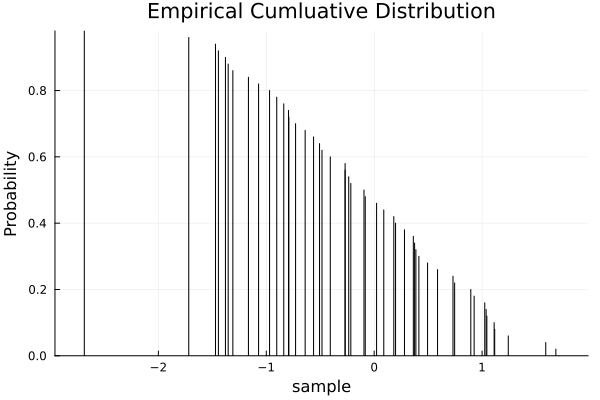

In [ ]:
using Plots
n = 50
g1 = [randn() for i = 1:n] # generate the samples

p = plot(sort(g1), 1 .- (1:n)./n,
    xlabel = "sample", ylabel = "Probability",
    title = "Empirical Cumluative Distribution", label = "", seriestype=:bar, num_bins=10 )

In [ ]:
using Plots

plt=histogram(degrees,probabilities

x1=plt[1][2][:x]
y1=plt[1][2][:y]
println(x1,y1)
y1=1 .- cumsum(y1)

bar(x1,y1)

#plt=bar(x, y, label="Original Data", xlabel="X", ylabel="Y")

# Plot the modified data



LoadError: syntax: missing comma or ) in argument list

In [ ]:
using Plots

plt=histogram(degrees,probabilities,bins=12)
x1=plt[1][2][:x]
y1=plt[1][2][:y]
println(x1,y1)

y1=1 .- cumsum(y1)

bar(x1,y1)


LoadError: UndefVarError: degrees not defined

In [ ]:
probabilities

LoadError: UndefVarError: probabilities not defined

In [ ]:
sum(probabilities)

LoadError: UndefVarError: probabilities not defined

In [ ]:
  degree_counts = Graphs.degree_histogram(network)

    # Calculate probabilities
    num_nodes = nv(network)


    pdf = sort(Dict(degree => count / num_nodes for (degree, count) in degree_counts))

    degrees = collect(keys(pdf))
    probabilities = collect(values(pdf))

LoadError: UndefVarError: network not defined

In [ ]:
plt=plot(x, y, label="Original Data", xlabel="X", ylabel="Y")

# Plot the modified data

collect(plt[1][1][:y])

LoadError: UndefVarError: x not defined

# Need Help?

* Learning: https://julialang.org/learning/
* Documentation: https://docs.julialang.org/
* Questions & Discussions:
  * https://discourse.julialang.org/
  * http://julialang.slack.com/
  * https://stackoverflow.com/questions/tagged/julia

If you ever ask for help or file an issue about Julia, you should generally provide the output of `versioninfo()`.

Add new code cells by clicking the `+ Code` button (or _Insert_ > _Code cell_).

Have fun!

<img src="https://raw.githubusercontent.com/JuliaLang/julia-logo-graphics/master/images/julia-logo-mask.png" height="100" />